<a href="https://colab.research.google.com/github/ValentinTrita/ValentinTrita/blob/main/Tema%20finala%20regresie%20liniara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1844]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd



In [1845]:
print(tf.__version__)

2.9.2


In [1846]:
dataset = pd.read_csv('Tema regresie liniara.csv' , date_parser = True)

In [1847]:
dataset.head()

,An,Numar Abonati
0,2012.0,214.967
1,2013.0,247.411
2,2014.0,312.533
3,2015.0,285.506
4,2016.0,116.016


In [1848]:
dataset2 = dataset.copy()

In [1849]:
dataset2.head()

,An,Numar Abonati
0,2012.0,214.967
1,2013.0,247.411
2,2014.0,312.533
3,2015.0,285.506
4,2016.0,116.016


In [1850]:
len(dataset2.index)

21

In [1851]:
dataset2.isna().sum()

An               5
Numar Abonati    5
dtype: int64

In [1852]:
dataset2 = dataset2.dropna()

In [1853]:
len(dataset2.index)

16

In [1854]:
dataset2 = dataset2[(dataset2 > 0).all (axis=1)]

In [1855]:
len(dataset2.index)

16

In [1856]:
dataset2 = dataset2.round({'Numar Abonati':1})

In [1857]:
dataset2.tail()

,An,Numar Abonati
11,2005.0,115.0
12,2006.0,130.4
13,2007.0,129.0
14,2008.0,161.6
15,2004.0,126.4


In [1858]:
dataset2 = dataset2.sort_values('Numar Abonati')

In [1859]:
dataset2.head()

,An,Numar Abonati
8,2020.0,57.7
7,2019.0,66.4
6,2018.0,81.7
9,2021.0,82.8
5,2017.0,94.4


In [1860]:
train_dataset = dataset2.sample(frac=0.8, random_state=0)

In [1861]:
test_dataset = dataset2.drop(train_dataset.index)

In [1862]:
len(test_dataset.index)

3

In [1863]:
len(train_dataset.index)

13

In [1864]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [1865]:
X_train = train_dataset[['Numar Abonati']].copy()
df = pd.DataFrame(X_train)
x = df.values.reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = x_scaled
X_train = np.array(df)
X_train = np.reshape(df, (13,))

In [1866]:
Y_train = train_dataset[['An']].copy()
df = pd.DataFrame(X_train)
x = df.values.reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = x_scaled
Y_train = np.array(df)
Y_train = np.reshape(df, (13,))

In [1867]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [1868]:
regresor=Sequential()
regresor.add(Dense(units=1,input_shape=[1,]))

regresor.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [1869]:
regresor.compile(optimizer='adam', loss= 'mean_squared_error')
regresor.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 329ms/step - loss: 0.0117
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 0.0115
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 0.0112
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 0.0110
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 0.0107


In [1870]:
x = tf.linspace(0, 1,100 )
y = regresor.predict(x)

4/4 [==============================] - 0s 2ms/step


In [1871]:
def plot_regresie(x, y):
  plt.scatter(train_dataset['Numar Abonati'], train_dataset['An'], label='Data')
  plt.plot(x* 312533, y* 2022, color='k', label='Predictions')
  plt.xlabel('An')
  plt.ylabel('Numar Abonati')
  plt.legend()
  

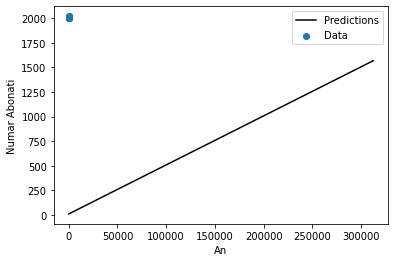

In [1872]:
plot_regresie(x, y)

In [1873]:
train_dataset, test_dataset

(        An  Numar Abonati
 7   2019.0           66.4
 11  2005.0          115.0
 15  2004.0          126.4
 13  2007.0          129.0
 1   2013.0          247.4
 5   2017.0           94.4
 6   2018.0           81.7
 3   2015.0          285.5
 12  2006.0          130.4
 4   2016.0          116.0
 2   2014.0          312.5
 14  2008.0          161.6
 9   2021.0           82.8,         An  Numar Abonati
 8   2020.0           57.7
 10  2022.0           98.3
 0   2012.0          215.0)